In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [9]:
ts = pd.read_csv("Train_SU63ISt.csv")
ts["Date_time"] = pd.to_datetime(ts["Datetime"])
ts.drop('Datetime',axis=1,inplace=True)
print(ts.shape)
ts.head()

(18288, 3)


,ID,Count,Date_time
0,0,8,2012-08-25 00:00:00
1,1,2,2012-08-25 01:00:00
2,2,6,2012-08-25 02:00:00
3,3,2,2012-08-25 03:00:00
4,4,2,2012-08-25 04:00:00


In [10]:
ts.drop(['ID'],axis=1,inplace=True)
ts['Date_time'].dtype

dtype('<M8[ns]')

In [11]:
ts.head()

,Count,Date_time
0,8,2012-08-25 00:00:00
1,2,2012-08-25 01:00:00
2,6,2012-08-25 02:00:00
3,2,2012-08-25 03:00:00
4,2,2012-08-25 04:00:00


In [12]:
ts["year"] = ts["Date_time"].dt.year
ts["month"] = ts["Date_time"].dt.strftime('%b')
ts.head(10)

,Count,Date_time,year,month
0,8,2012-08-25 00:00:00,2012,Aug
1,2,2012-08-25 01:00:00,2012,Aug
2,6,2012-08-25 02:00:00,2012,Aug
3,2,2012-08-25 03:00:00,2012,Aug
4,2,2012-08-25 04:00:00,2012,Aug
5,2,2012-08-25 05:00:00,2012,Aug
6,2,2012-08-25 06:00:00,2012,Aug
7,2,2012-08-25 07:00:00,2012,Aug
8,6,2012-08-25 08:00:00,2012,Aug
9,2,2012-08-25 09:00:00,2012,Aug


C:\Users\bhara\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


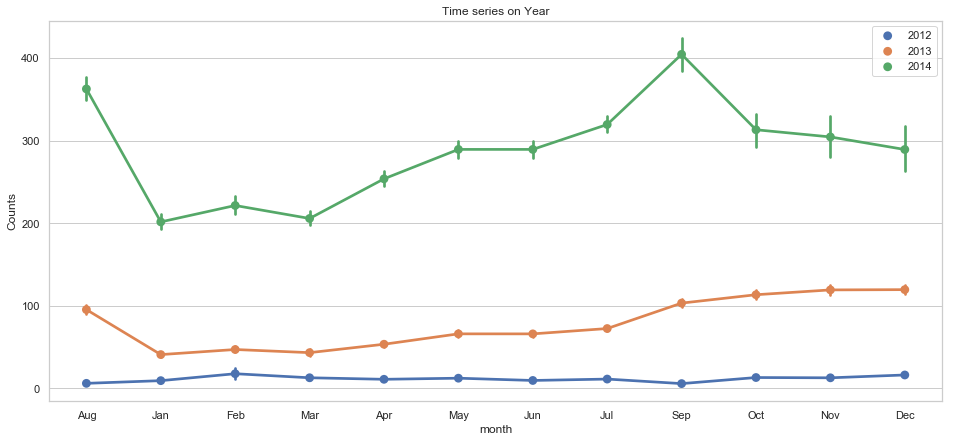

In [13]:
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="Count", hue="year", data=ts, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Counts")
plt.title("Time series on Year")
plt.legend(loc='upper right')

In [14]:
ts.index = ts.Date_time

In [15]:
ts.drop('Date_time',axis=1,inplace=True)

In [16]:
ts.head()

,Count,year,month
Date_time,,,
2012-08-25 00:00:00,8,2012,Aug
2012-08-25 01:00:00,2,2012,Aug
2012-08-25 02:00:00,6,2012,Aug
2012-08-25 03:00:00,2,2012,Aug
2012-08-25 04:00:00,2,2012,Aug


In [17]:

ts = ts.resample('D').sum()

In [18]:

ts.head(10)

,Count,year
Date_time,,
2012-01-09,112,48288
2012-01-10,248,48288
2012-01-11,304,48288
2012-01-12,210,48288
2012-01-13,0,0
2012-01-14,0,0
2012-01-15,0,0
2012-01-16,0,0
2012-01-17,0,0


In [19]:
#ts.fillna(method='bfill',inplace=True)

In [20]:
#ts.head()

Text(0.5,1,'Time Series')

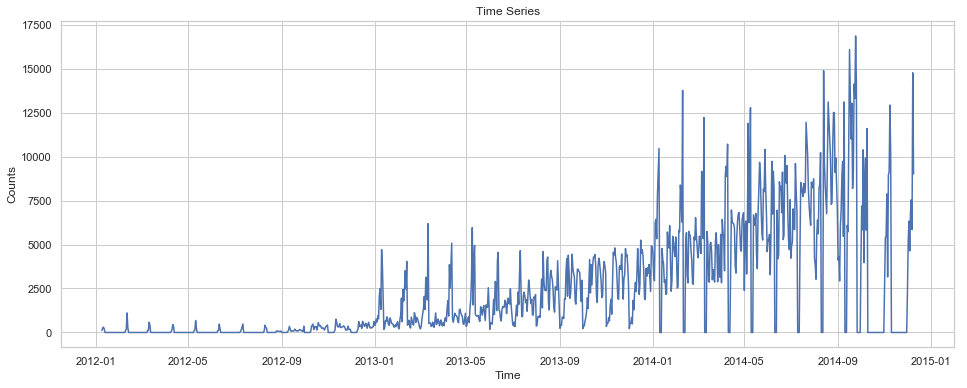

In [21]:
plt.figure(figsize=(16, 6))
plt.plot(ts.index, ts["Count"])
#plt.plot(range(ts.shape[0]),ts.Count)
plt.xlabel("Time")
plt.ylabel("Counts")
plt.title("Time Series")

In [22]:
decompose = pd.DataFrame(ts.Count)
decompose.index = ts.index
decompose.head(10)


,Count
Date_time,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0
2012-01-14,0
2012-01-15,0
2012-01-16,0
2012-01-17,0


In [23]:
#This is to confirm if there are any null values present
decompose.isna().any().any()

False

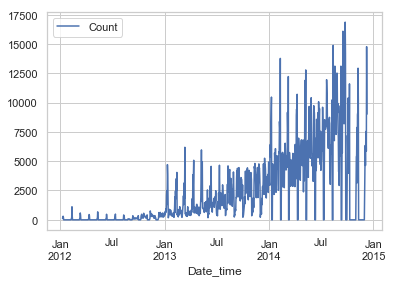

In [24]:
decompose.plot()

In [25]:

decompose = decompose.asfreq(freq='D')

In [26]:
#decompose = decompose.fillna(0)
#decompose = decompose.asfreq(freq='D')
decompose.head()

,Count
Date_time,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0


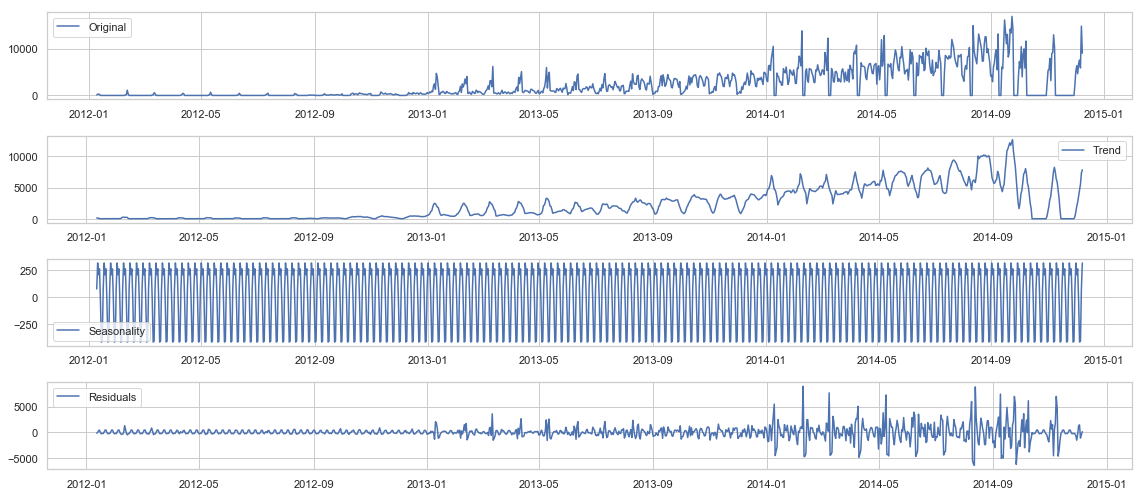

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts["Count"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


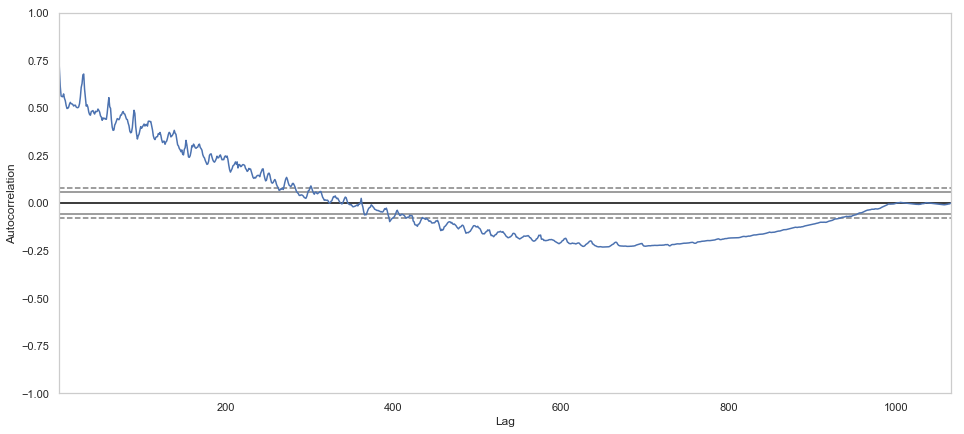

In [28]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
plot_lags= 25
autocorrelation_plot(decompose.Count)


Test Statistic                   -2.901196
p-value                           0.045209
#Lags Used                       14.000000
Number of Observations Used    1051.000000
Critical Value (1%)              -3.436587
Critical Value (5%)              -2.864294
Critical Value (10%)             -2.568236
dtype: float64


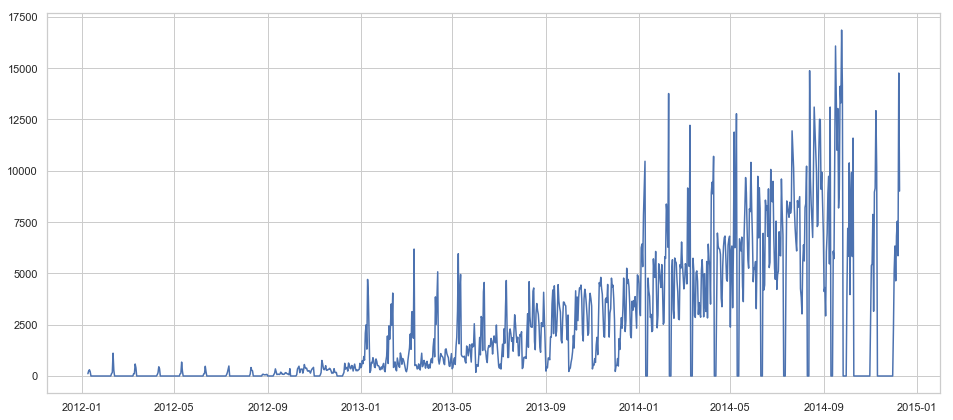

In [29]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(data):
    dftest = adfuller(data.Count, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.Count)
    plt.show()

stationarity_test(decompose)
#Test statistic is very low as compare to 1% critical level so getting info that series is stationary

Test Statistic                   -3.221445
p-value                           0.018776
#Lags Used                       13.000000
Number of Observations Used    1052.000000
Critical Value (1%)              -3.436581
Critical Value (5%)              -2.864291
Critical Value (10%)             -2.568235
dtype: float64


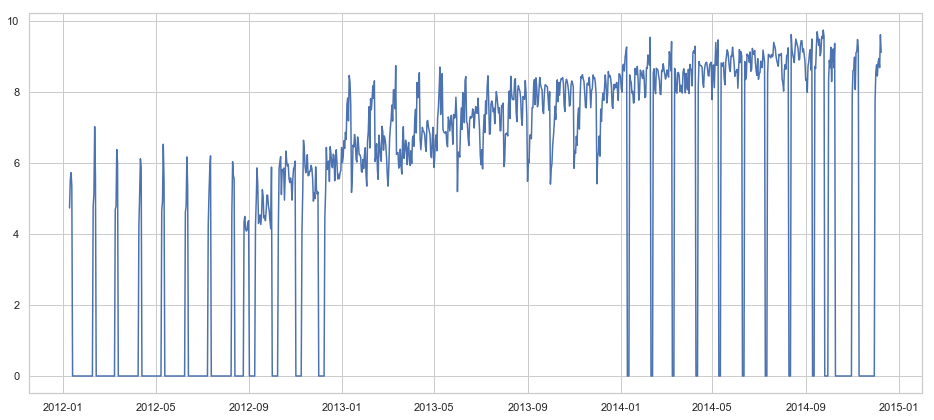

In [30]:
## Now take the log (To make variance constant) and check for stationary again 
import math
log_train = decompose
log_train = log_train["Count"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)                                #variance seems constant
stationarity_test(log_train)    

Test Statistic                -1.426750e+01
p-value                        1.392481e-26
#Lags Used                     1.200000e+01
Number of Observations Used    1.053000e+03
Critical Value (1%)           -3.436575e+00
Critical Value (5%)           -2.864289e+00
Critical Value (10%)          -2.568234e+00
dtype: float64


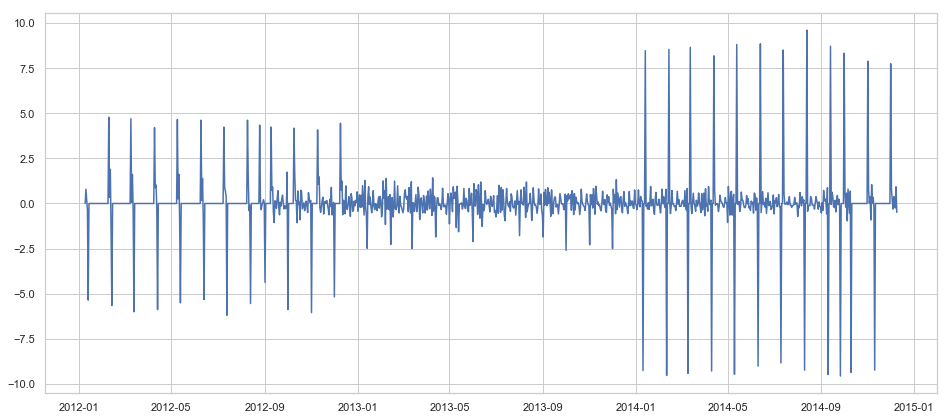

In [31]:
first_diff = log_train["Count"] - log_train["Count"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)                             # P-value is less than 0.05,so series is stationary
stationarity_test(first_diff)

Test Statistic                -1.415183e+01
p-value                        2.155180e-26
#Lags Used                     2.200000e+01
Number of Observations Used    1.043000e+03
Critical Value (1%)           -3.436635e+00
Critical Value (5%)           -2.864315e+00
Critical Value (10%)          -2.568248e+00
dtype: float64


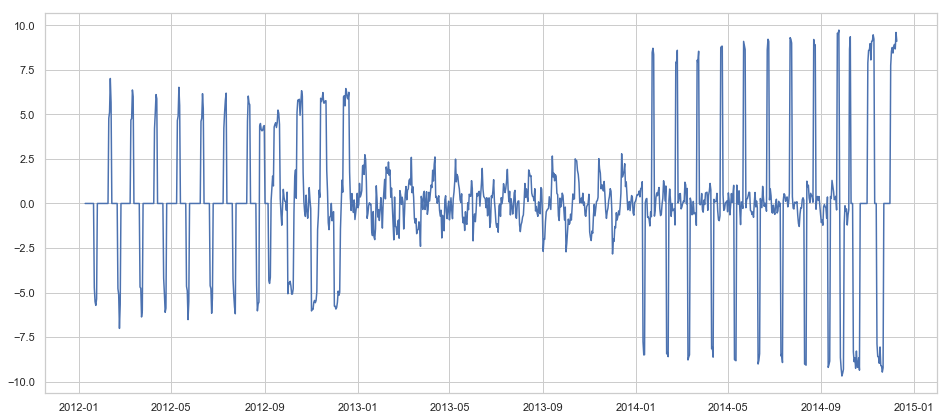

In [32]:
seasonal_data_differenced = log_train["Count"] - log_train["Count"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)                 #series seems quite stationary

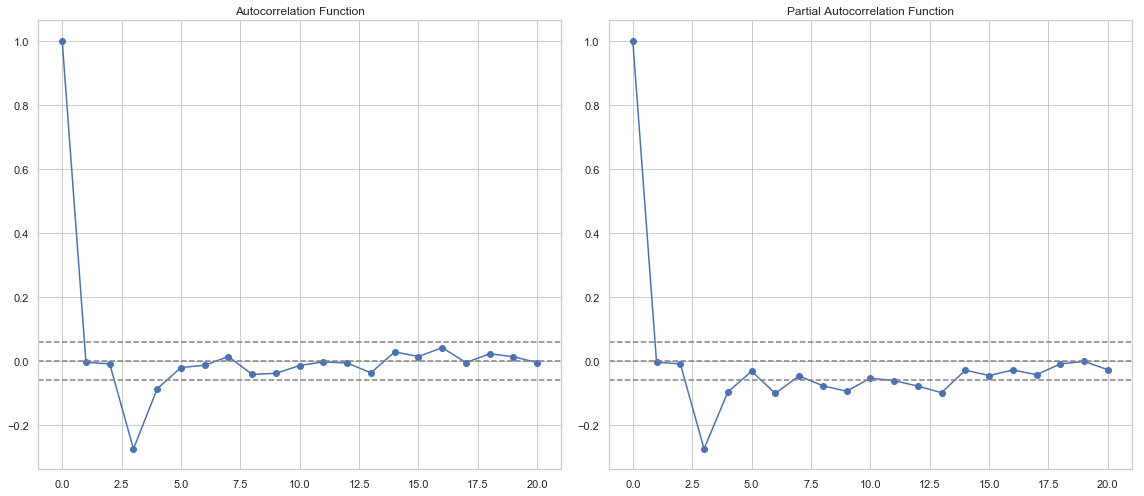

In [33]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [34]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  

C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(decompose,test_size=0.25,shuffle=False)

13110.589505664924


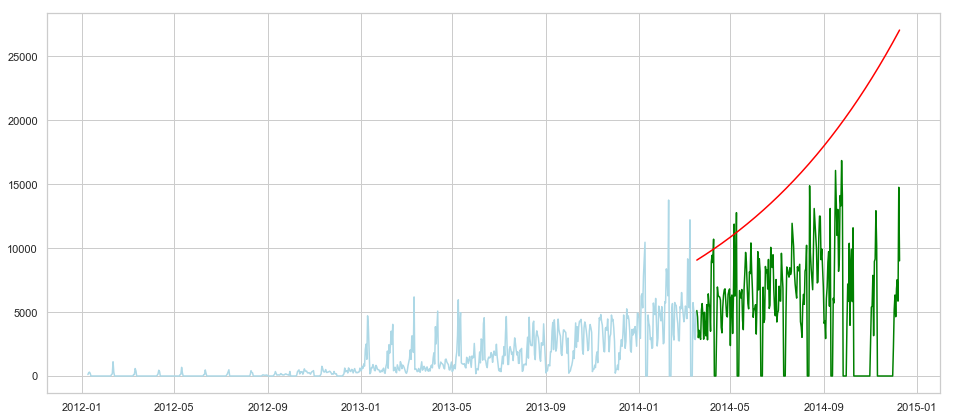

In [36]:
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [37]:
import numpy as np

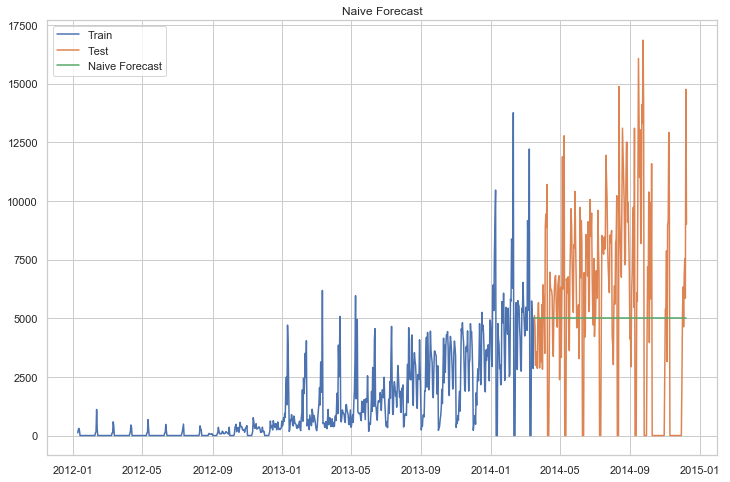

In [43]:
dd= np.asarray(x_train.Count)
y_hat = x_test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(x_train.index, x_train['Count'], label='Train')
plt.plot(x_test.index,x_test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()



In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(x_test.Count, y_hat.naive))
print(rms)


4054.699704402768


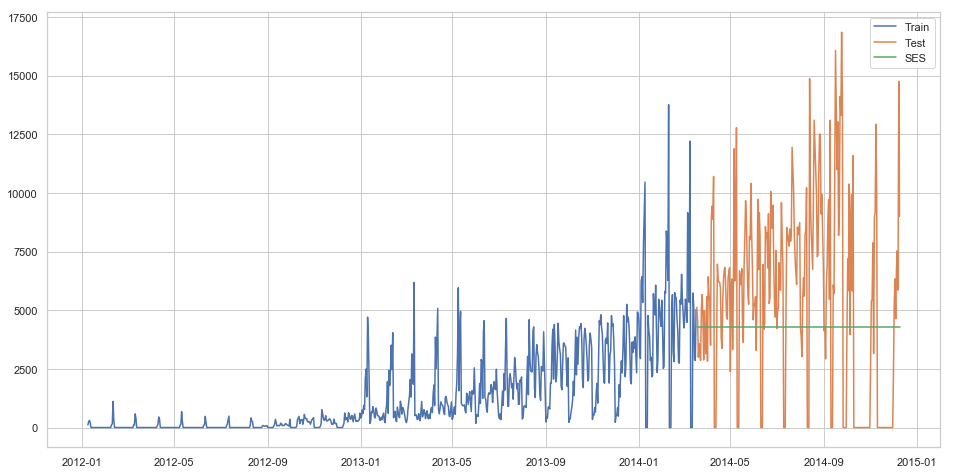

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = x_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(x_train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(x_test))
plt.figure(figsize=(16,8))
plt.plot(x_train['Count'], label='Train')
plt.plot(x_test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(x_test.Count, y_hat_avg.SES))
print(rms)


4211.65736100485


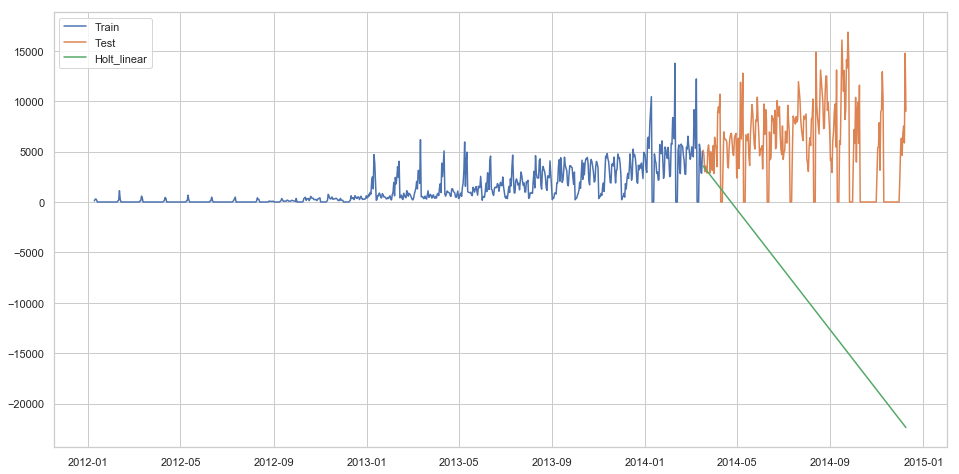

In [47]:
y_hat_avg = x_test.copy()

fit1 = Holt(np.asarray(x_train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(x_test))

plt.figure(figsize=(16,8))
plt.plot(x_train['Count'], label='Train')
plt.plot(x_test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [48]:
rms = sqrt(mean_squared_error(x_test.Count, y_hat_avg.Holt_linear))
print(rms)

16878.706532380955


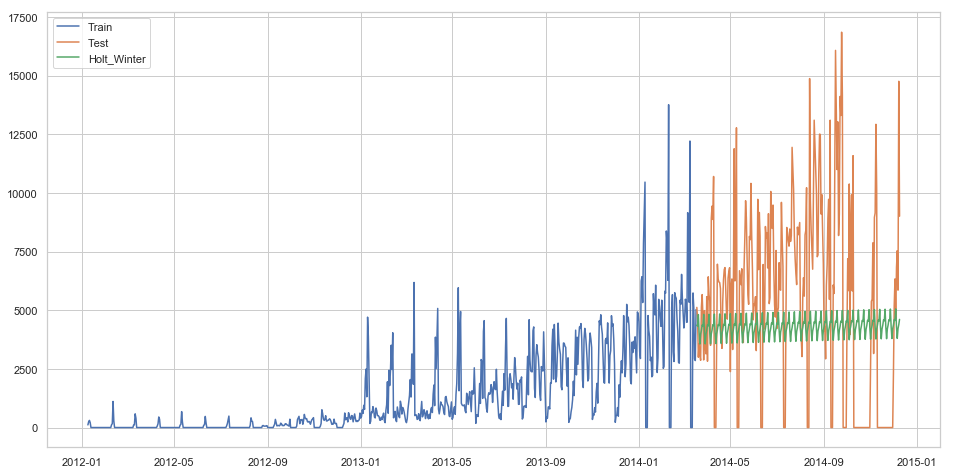

In [57]:
y_hat_avg = x_test.copy()
fit1 = ExponentialSmoothing(np.asarray(x_train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(x_test))
plt.figure(figsize=(16,8))
plt.plot( x_train['Count'], label='Train')
plt.plot(x_test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [52]:
rms = sqrt(mean_squared_error(x_test.Count,y_hat_avg['Holt_Winter'] ))
print(rms)


4196.7147927146725
